# OSMnx overview: querying, simplifying, visualizing, saving

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Documentation](https://osmnx.readthedocs.io/)
  - [Journal article and citation info](https://doi.org/10.1111/gean.70009)
  - [Code repository](https://github.com/gboeing/osmnx)
  - [Examples gallery](https://github.com/gboeing/osmnx-examples)
  
Once you've perused the [features demo notebook](00-osmnx-features-demo.ipynb), this notebook demonstrates more details on querying for place boundaries and street networks, visualizing, and saving models to disk.

In [1]:
!uv pip install --system --quiet osmnx
from pathlib import Path

import geopandas as gpd
import osmnx as ox

ox.__version__

'2.0.6'

In [2]:
# turn response caching off
ox.settings.use_cache = False

# turn it back on and turn on/off logging to your console
ox.settings.use_cache = True
ox.settings.log_console = False

#### Pass a lat-lng point and bounding box distance in meters
This creates a bounding box *n* meters North, South, East, and West of the point, then constructs the network from all the OSM nodes and ways within the bounding box.

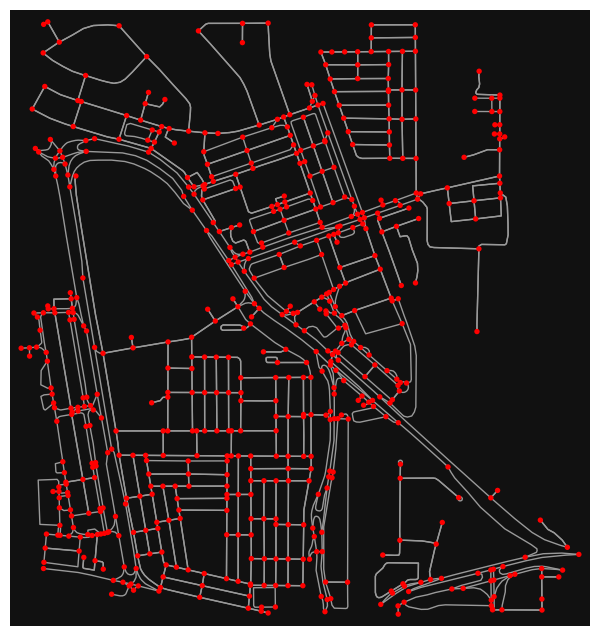

In [3]:
# Menara LGB coordinates - EXACT LOCATION
# Menara LGB (Lembaga Getah Malaysia Building)
location_point = (3.13792463037415, 101.62946855487311)

# create network from point, inside bounding box of N, S, E, W each 750m from point
G = ox.graph.graph_from_point(location_point, dist=750, dist_type="bbox", network_type="drive_service")

fig, ax = ox.plot.plot_graph(G, node_color="r")

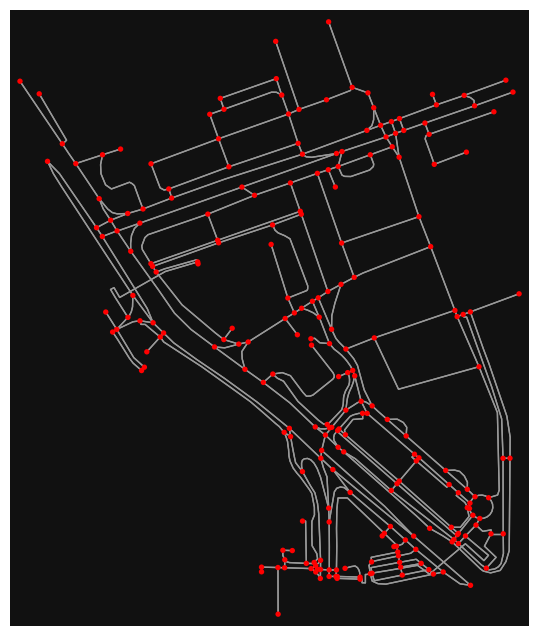

In [4]:
# create network only of nodes within 500m walking along the network from point
G = ox.graph.graph_from_point(location_point, dist=500, dist_type="network", network_type="walk")
fig, ax = ox.plot.plot_graph(G, node_color="r")

In [5]:
# create a network around some (lat, lng) point but do not simplify it yet
location_point = (33.299896, -111.831638)
G = ox.graph.graph_from_point(
    location_point,
    network_type="drive_service",
    dist=500,
    simplify=False,
)

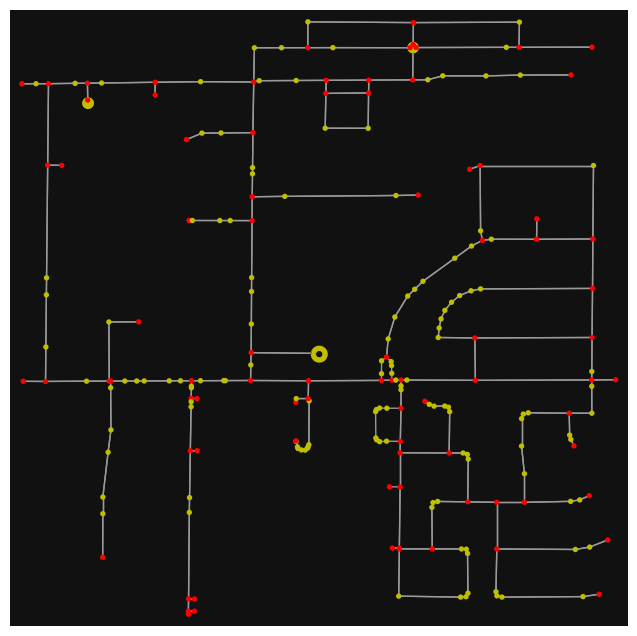

In [6]:
# turn off strict mode and see what nodes we'd remove, in yellow
nc = ["r" if ox.simplification._is_endpoint(G, node, None, None) else "y" for node in G.nodes()]
fig, ax = ox.plot.plot_graph(G, node_color=nc)

The dots above are OSM nodes. We'll remove the nodes in yellow as they're not real network nodes (intersections/dead-ends).

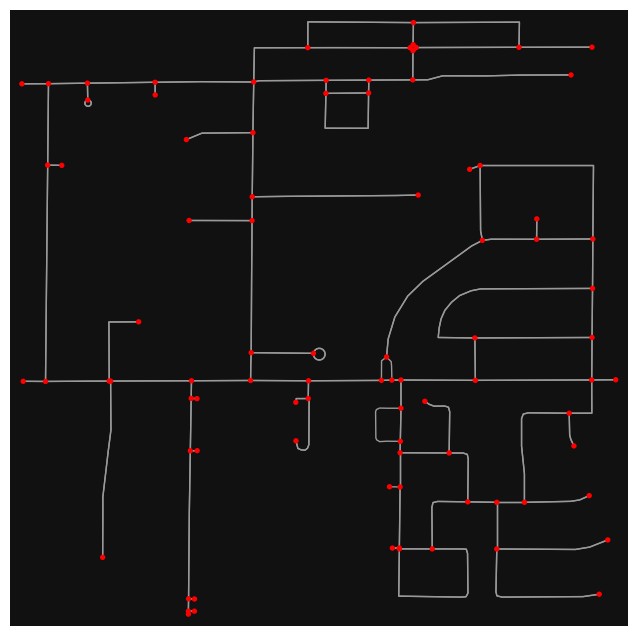

In [7]:
# simplify the network
G = ox.simplification.simplify_graph(G)
fig, ax = ox.plot.plot_graph(G, node_color="r")

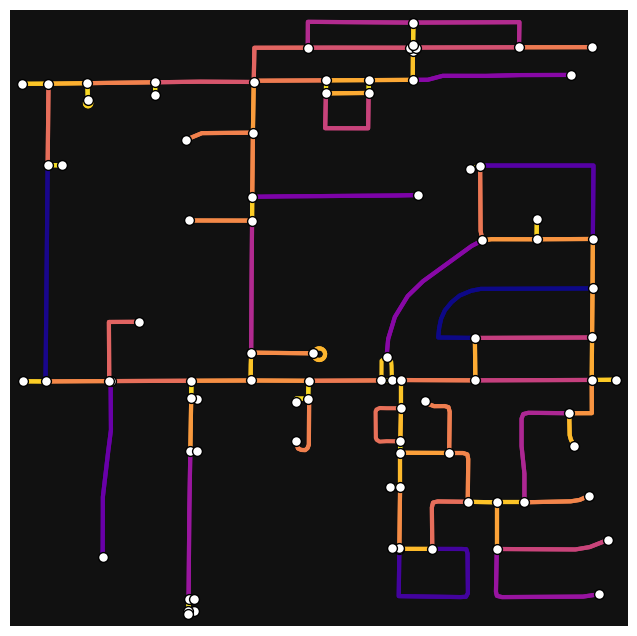

In [8]:
# show the simplified network with edges colored by length
ec = ox.plot.get_edge_colors_by_attr(G, attr="length", cmap="plasma_r")
fig, ax = ox.plot.plot_graph(
    G,
    node_color="w",
    node_edgecolor="k",
    node_size=50,
    edge_color=ec,
    edge_linewidth=3,
)

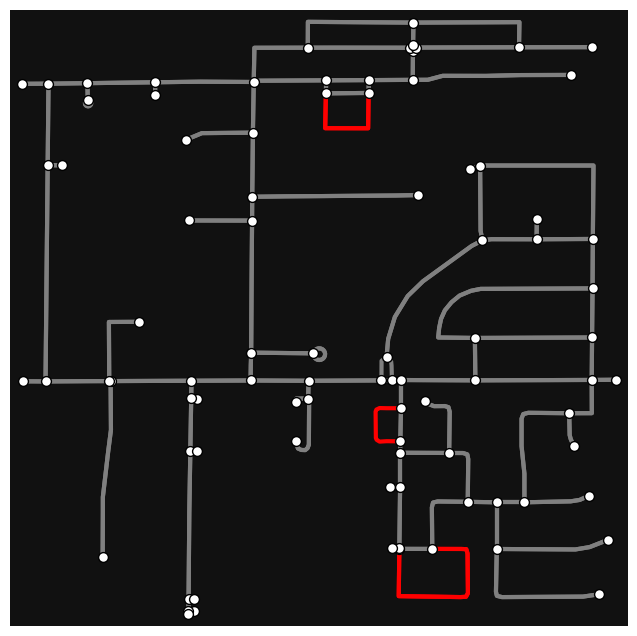

In [9]:
# highlight all parallel (multiple) edges
ec = ["gray" if k == 0 or u == v else "r" for u, v, k in G.edges(keys=True)]
fig, ax = ox.plot.plot_graph(
    G,
    node_color="w",
    node_edgecolor="k",
    node_size=50,
    edge_color=ec,
    edge_linewidth=3,
)

In [10]:
# highlight all one-way edges in the mission district network from earlier
ec = ["r" if data["oneway"] else "w" for u, v, key, data in G2.edges(keys=True, data=True)]
fig, ax = ox.plot.plot_graph(G2, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7)

NameError: name 'G2' is not defined

## Part 4: saving networks to disk

For more examples of saving and loading networks to/from disk, see [this notebook](05-save-load-networks.ipynb).

In [14]:
# save street network as GeoPackage to work with in GIS
ox.io.save_graph_geopackage(G, filepath="./data/network.gpkg")

In [15]:
# save street network as GraphML file to work with later in OSMnx or networkx or gephi
ox.io.save_graphml(G, filepath="./data/network.graphml")

## Part 5: calculate basic network indicators

In [16]:
# calculate basic street network metrics and display average circuity
stats = ox.stats.basic_stats(G)
stats["circuity_avg"]

1.1376372232349172

In this street network, the streets are ~14% more circuitous than the straight-lines paths would be.

For examples of analyzing street networks, see [this example](06-stats-indicators-centrality.ipynb).